**NOTE:** You probably will see warnings. These are not errors! However, you should read them and try to understand why they're there. Can you fix them?

![](http://rentinginla.com/wp-content/uploads/2015/12/Buying.jpg)
# [Project 2: Predicting House Prices with Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

The goal of this project is for you to use EDA, visualization, data cleaning, preprocesing, and linear models to predict home prices given the features of the home, and interpret your linear models to find out what features add value to a home! This project is a bit more open-ended than project 1. 

Be sure to ...

* Think about your choices when it comes to your choices about the data. Be ready to defend your decisions!
* Use lots of plots to dig deeper into the data! Describe the plots and convey what you learned from them.
* Don't forget to read the [description of the data](../data_description.txt) (also available at the kaggle website)! This has valuable information that will help you clean and impute data. `NaN` means something in many of the columns! Don't just drop or fill them!
* Try fitting many models! Document your work and note what you've tried.
* Apply what you've learned in class, books, videos, Kaggle forums, and blog posts. There have been a TON of blog posts about this;  you should seek them out and read them!


From the Kaggle competition website:

    Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

    With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.display import display

%matplotlib inline 
np.random.seed(42)

## 1. Load the Data 

* The data comes in three separate CSVs located in `../data/`. 
* Load the CSV into a `DataFrame`. 
* Make sure to check the `.head` or `.sample`. How many rows? How many columns?
* Familiarize yourself with the column names and what they represent.
* Is there a column that can be set as the `index`? If so, set that column as the index when loading the data. (`df.set_index()`)

In [2]:
housing = pd.read_csv('../data/train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are 81 columns, and 1460 rows.  The column 'Id' can be set as an index.  There are null values on several columns. 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
housing = housing.set_index('Id')

**Bonus:** Write an assertion statement to programmatically verify the correct number of rows and columns were imported.

In [9]:
assert housing.shape == (1460, 80)

## 2. Exploratory Data Analysis (EDA)

### A. Data Types

Read the data description on Kaggle. Which variables are numerical and categorical? Are there any columns that can be deleted? 

Make sure the `dtype` of each column is correct. 

**NOTE:** There is one column in particular that should be categorical but will load in pandas as numeric.

In [10]:
# Because MSSubClass is categorical but encoded as numeric, we convert the dtype object.
housing['MSSubClass'] = housing['MSSubClass'].astype('object')

### B. Plot histograms of the numeric columns. 

In [13]:
numeric_columns = housing.select_dtypes(exclude=['object']).columns

In [14]:
numeric_columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


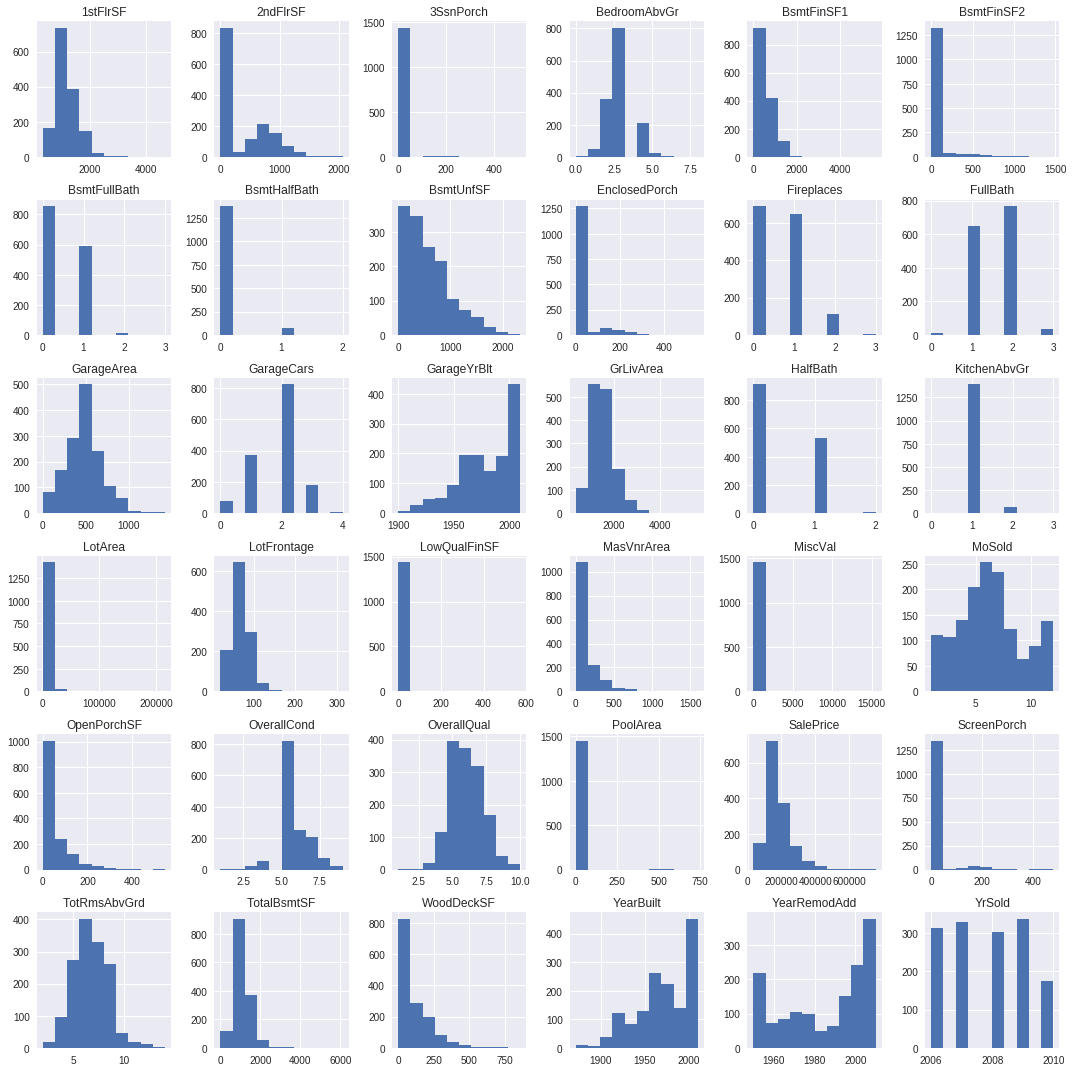

In [88]:
# Plotting the numerical columns
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
housing[numeric_columns].hist(ax=ax)
fig.tight_layout()
fig.show()

fig.savefig('numeric_hist.png')

#### What are your observations? Add them to this markdown cell.

* There are 36 relevant numerical features. 
* There are different types of features:
 * Square footage
 * Time
 * Room and amenities
 * Condition and quality
* Most of the variables that deal with the actual physical space of the apartment are postively skewed - which makes sense, as people tend to live in smaller homes/apartments apart from the extremely wealthy.  
* Sale Price also has a similar postively skewed distribution - I hypothesize that the variables dealing with the acutal dimensions of the apartment have a large impact on Sale Price. 



### C. Plot the Numeric Columns Against `SalePrice` using scatter plots.

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


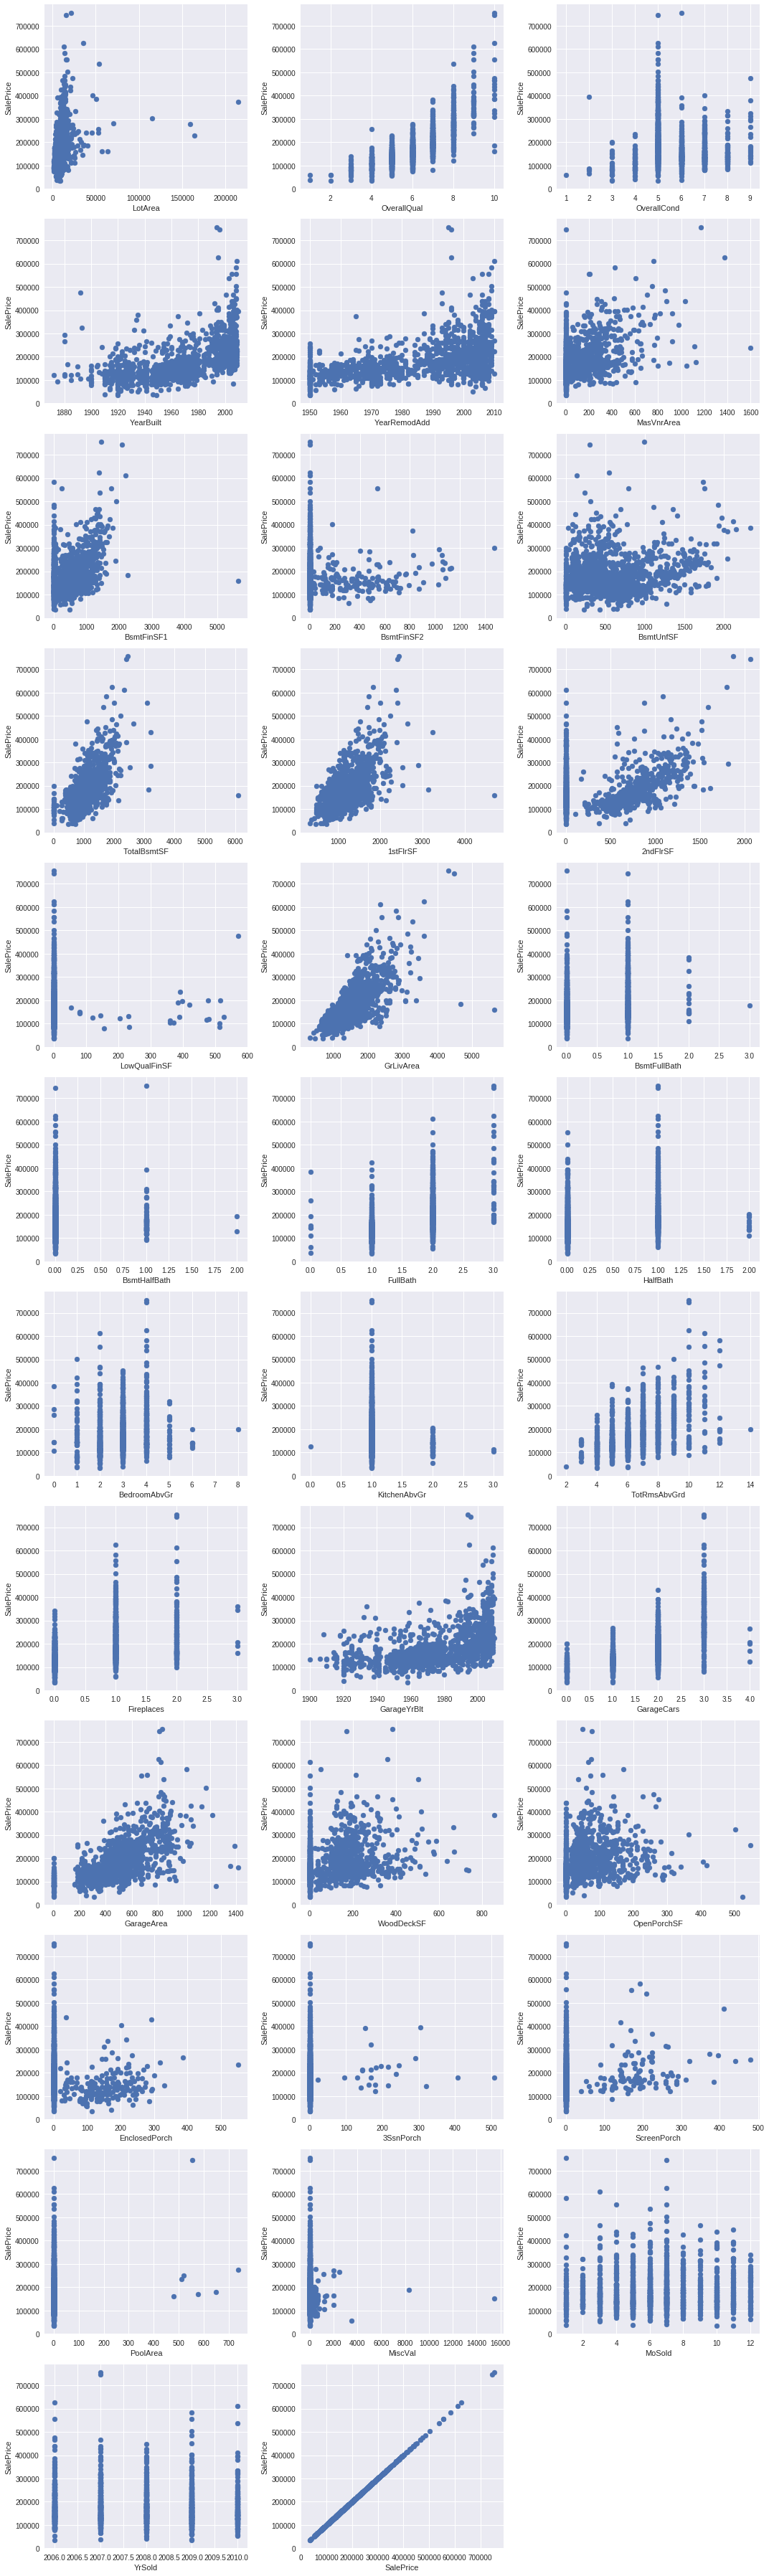

In [89]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(numeric_columns[1:]):
    fig.add_subplot(12,3,1+i)
    plt.scatter(housing[col], housing['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
fig.tight_layout()
fig.show()

fig.savefig('numeric_scatter.png')

#### What are your observations? Add them to this markdown cell.

---
* There looks to be a lot of null values in the data (looking at ther 'vertical bars' at 0 along the x-axis) - will need to deal with them before analysis. 
* Many of the variables are discrete and not continuous. As mentioned earlier in the histograms, dimension-related variables seem to follow a similar pattern as the Sale Price and might be good indicators. 
* Many features do not have a strong relationship with Sale Price, such as 'Year Sold'. 


### D. Use bar plots to plot categorical features against `SalePrice`. 

**HINT:** Look up how to create bar plots in `matplotlib`. You will have to transform the data before you can create a bar plot! Also, look up [how to plot error bars](https://pandas.pydata.org/pandas-docs/stable/visualization.html#plotting-with-error-bars) so you can also observe the variability in your data!

In [18]:
categorical_columns = housing.select_dtypes(['object']).columns

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


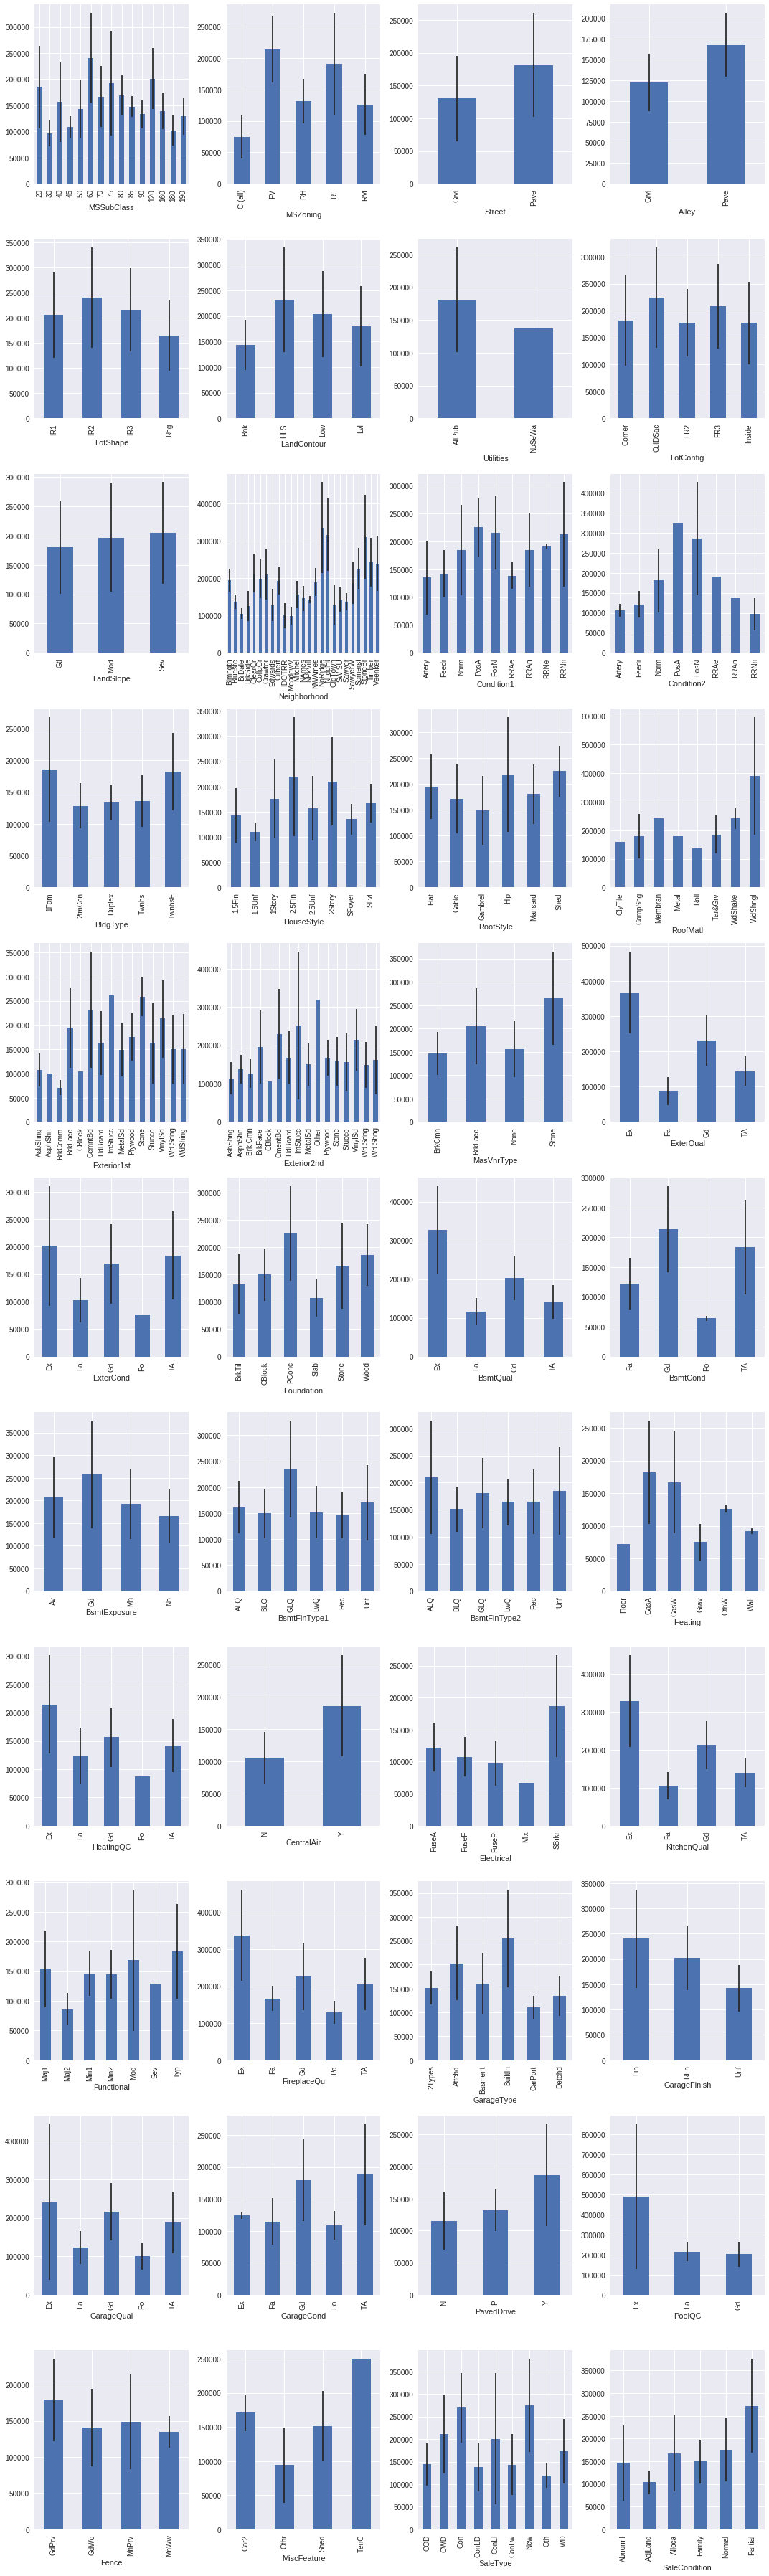

In [90]:
fig = plt.figure(figsize=(15,50))
for i, col in enumerate(categorical_columns):
    fig.add_subplot(11,4,1+i)
    housing.groupby(col).mean()['SalePrice'].plot.bar(yerr = housing.groupby(col).std())
fig.tight_layout()
fig.show()

fig.savefig('categorical_bar.png')

#### What are your observations? Add them to this markdown cell.

---

* Only some of the categorical columns seem to have a strong impact on Sale Price. Having a paved street, excellent 'BsmtQual' and 'ExterQual', and Central Air seem like they have a correlation with higher Sale Price. 


## 3. Preprocessing

### A. Identify and Remove Outliers for `SalePrice`

Make sure to... 
* Plot a histogram of the housing price. 
* Supply a definition of what an outlier is by your criteria. Does Tukey's method make sense with 1.5 times the interquartile range, or should that range be increased or decreased?
* Use masking to remove the outliers as you've defined them.

In [20]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [21]:
IQR = housing['SalePrice'].quantile(.75) - housing['SalePrice'].quantile(.25)

IQR

84025.0

In [26]:
upper_bound = housing['SalePrice'].quantile(.75) + 3 * IQR
upper_bound_mask = housing.SalePrice > upper_bound

In [27]:
upper_bound

466075.0

In [28]:
lower_bound = housing['SalePrice'].quantile(.25) - 3 * IQR
lower_bound_mask = housing.SalePrice < upper_bound

Tukey's method for defining outliers (1.5 * IQR) cut out too much of the data, so I used 3 * IQR instead.

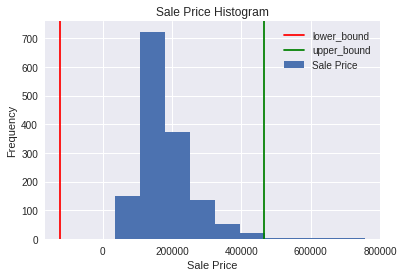

In [30]:
plt.hist(housing['SalePrice'], label='Sale Price')
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Sale Price Histogram")
plt.axvline(lower_bound, color='r', label='lower_bound')
plt.axvline(upper_bound, color='g', label='upper_bound')
plt.legend()
plt.show()

In [31]:
housing_no_outliers = housing[(housing.SalePrice < upper_bound) | (housing.SalePrice > lower_bound)]

### B. Fill missing data!

* How many null values are in each column? Make a bar plot showing this only for columns with missing data.
* For each column with nulls, do nulls represent anything? Read the data description.
  * Some columns that are appearing as _null_ might legitimately be known (ie: "na").  Double check the [data description](../data_description.txt) for proper value representation.  A feature might actually be better represented by "not available" or "na" rather than `NULL` or `NaN`.  There's a difference between `NULL` (unknown), and "NA" (not available).  It might mean the difference between "there isn't a garage" and "there is no garage data". 
* Fill null values for each column by imputation. Here are some common methods for imputation:
  1. Using domain knowledge to select an appropriate value.
  1. Value from a randomly selected row.
  2. Mean, median, or mode value of the series.
  3. Value estimated by a predictive model.
* Make sure to justify your method for filling null values.
  

In [32]:
housing_no_outliers.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [33]:
housing_nan_columns = []

for column in housing_no_outliers:
    if housing_no_outliers[column].isnull().sum() > 0:
        housing_nan_columns.append(column)

housing_nan_columns

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

* LotFrontage: Linear feet of street connected to property - replace with 0 
* Alley: NA means 'no alley access'
* MasVnrType: None means no veneer
* MasVnrArea: Masonry Veneer area in square feet (na rows are the same as MasVnrType)
* BsmntQual: NA means 'no basement'
* BsmntCond: NA means 'no basement'
* BsmntExposure: NA means 'no basement'
* BsmntFinType1: NA means 'no basement'
* BsmntFinType2: NA means 'no basement'
* Electrical: will drop this value
* FireplaceQC: NA means 'no fireplace'
* GarageType: NA means 'no garage'
* GarageYrBlt: Replace with median
* GarageFinish: NA means 'no garage'
* GarageQual: NA means 'no garage'
* GarageCond: NA means 'no garage'
* PoolQC: NA means 'no pool'
* Fence: NA means 'no fence'
* MiscFeature: NA means 'None' (aka no miscellaneous features) 

For Masonry Veneer area, replace nulls with 0s 

For GarageYrBlt and LotFrontage, replace with median. 

For LotFrontage and Veneer, will use 0. #lotfrontgae and garageyrbuild = median, masvnr area - 0 

In [34]:
housing_no_outliers['LotFrontage'] = housing_no_outliers['LotFrontage'].fillna(0)

housing_no_outliers['Alley'] = housing_no_outliers['Alley'].fillna('no_alley')

housing_no_outliers['MasVnrType'] = housing_no_outliers['MasVnrType'].fillna('no_veneer')

housing_no_outliers['MasVnrArea'] = housing_no_outliers['MasVnrArea'].fillna(0)

housing_no_outliers['BsmtQual'] = housing_no_outliers['BsmtQual'].fillna('no_basement')

housing_no_outliers['BsmtCond'] = housing_no_outliers['BsmtCond'].fillna('no_basement')

housing_no_outliers['BsmtExposure'] = housing_no_outliers['BsmtExposure'].fillna('no_basement')

housing_no_outliers['BsmtFinType1'] = housing_no_outliers['BsmtFinType1'].fillna('no_basement')

housing_no_outliers['BsmtFinType2'] = housing_no_outliers['BsmtFinType2'].fillna('no_basement')

housing_no_outliers['Electrical'] = housing_no_outliers['Electrical'].fillna('no_electricity')

housing_no_outliers['FireplaceQu'] = housing_no_outliers['FireplaceQu'].fillna('no_fireplace')

housing_no_outliers['GarageType'] = housing_no_outliers['GarageType'].fillna('no_garage')

housing_no_outliers['GarageYrBlt'] = housing_no_outliers['GarageYrBlt'].fillna(np.nanmedian(housing_no_outliers['GarageYrBlt']))

housing_no_outliers['GarageFinish'] = housing_no_outliers['GarageFinish'].fillna('no_garage')

housing_no_outliers['GarageQual'] = housing_no_outliers['GarageQual'].fillna('no_garage')

housing_no_outliers['GarageCond'] = housing_no_outliers['GarageCond'].fillna('no_garage')

housing_no_outliers['PoolQC'] = housing_no_outliers['PoolQC'].fillna('no_pool')

housing_no_outliers['Fence'] = housing_no_outliers['Fence'].fillna('no_fence')

housing_no_outliers['MiscFeature'] = housing_no_outliers['MiscFeature'].fillna('no_misc_features')

Verify that you have *truly* eliminated all the null values!

In [36]:
housing_no_outliers.isnull().sum().sum()

0

### C. Create dummy variables for categorical columns

Use `pd.get_dummies()` to turn your categorical features into numeric features. Make sure there are **no null values** in your dataset before you do this!

In [39]:
#should/need to define categorical columns list
housing_dummies = pd.get_dummies(housing_no_outliers)

In [40]:
housing_dummies.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [41]:
housing_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 319 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(283)
memory usage: 825.5 KB


### D. Split your data into a train and test set.

* Use `train_test_split` to hold out a test set. 
* Why do we hold out a test set?

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = housing_dummies.drop('SalePrice', axis=1)

In [44]:
y = housing_dummies['SalePrice']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

We hold out a test set because we need to understand how our model performs on data it hasn't seen. We may create a model that fits our training data very well but does not score well on the test set, suggesting that it won't predict well given new data. With a test set, we can understand how our model performs on unseen data.

### E. Scale the data

Make sure to...
* instantiate a `StandardScaler` object
* `fit` the scaler on your training data
* `transform` both your training and test data.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## 4. Modeling

Now that you've completed your EDA, you can now use your training data to build a model to predict home price from your features! As far as regression methods, you've learned a few, including ordinary least squares (a.k.a. `LinearRegression`), `Lasso`, `Ridge`, and `ElasticNet`. 

### A. Benchmarking

As we get started with modeling we should have some basis for comparison to get a sense of what a "good" model is for this task. 

For this task, as we will be focusing on linear models, we will use the most naive of the linear models, the Linear Regression as our benchmark. 

In [48]:
from sklearn.linear_model import LinearRegression

#### Results Dictionary

Made a results `list` to hold results. After each model fit and score, I added a dictionary of the results to this list using `.append()`.

#### Make a new results list.

In [49]:
results = list()

#### Raw Benchmark

Instantiate a new `LinearRegression` model and save it as `benchmark_raw`.

In [50]:
benchmark_raw = LinearRegression()

- Fit the `benchmark_raw` model against the raw training data. 
- Score the `benchmark_raw` model against both the raw training set and the raw testing set. 
- Apprend a results dictionary to the `results` list. 

You could do this by

    results.append({'name':'benchmark',
                    'model': benchmark_raw,
                    'dataset' : 'train',
                    'preprocessing': 'raw',
                    'score': raw_train_score})
                    
Of course you can store a model in a dictionary!                    

In [51]:
benchmark_raw.fit(X_train, y_train)
raw_train_score = benchmark_raw.score(X_train, y_train)
raw_test_score = benchmark_raw.score(X_test, y_test)

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})
results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

#### Scaled Benchmark

- Fit the `benchmark_scaled` model against the scaled training data. 
- Score the `benchmark_scaled` model against both the scaled training set and the scaled testing set. 
- Write the results to the results `list`. 

In [52]:
benchmark_scaled = LinearRegression()

In [53]:
benchmark_scaled.fit(X_train_scaled, y_train)

scale_train_score = benchmark_scaled.score(X_train, y_train)
scale_test_score = benchmark_scaled.score(X_test, y_test)

results.append({'name': 'benchmark scaled',
                'model': benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scale_train_score})

results.append({'name':'benchmark scaled',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scale_test_score})

Use a DataFrame to display your results.

In [54]:
results = pd.DataFrame(results)

In [55]:
results

,dataset,model,name,preprocessing,score
0,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.536253e-01
1,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-6.027429e+08
2,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark scaled,scaled,-9.472495e+27
3,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark scaled,scaled,-8.318658e+27


#### What are your observations? Add them to this markdown cell.

---
* The training score is better than the test score, and the raw scores are better than the scaled scores.

### B. Naive Regularization

Next, prepare a series of fits using the three regularized linear regression models with their default settings.

Perform each of these against both the raw and the scaled data. In this section, you should be fitting six models.

- A naive Ridge Regression against the raw data
- A naive Lasso Regression against the raw data
- A naive ElasticNet Regression against the raw data
- A naive Ridge Regression against the scaled data
- A naive Lasso Regression against the scaled data
- A naive ElasticNet Regression against the scaled data

**NOTE:** By "naive" we mean using all of the default settings.

Note that we see warnings here. As we are in an exploration phase with our model, this is acceptable.

In [56]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [57]:
ridge = Ridge()
lasso = Lasso()
enet = ElasticNet()

In [58]:
raw_ridge = ridge.fit(X_train, y_train)
raw_lasso = lasso.fit(X_train, y_train)
raw_enet = enet.fit(X_train, y_train)

scaled_ridge = ridge.fit(X_train_scaled, y_train)
scaled_lasso = lasso.fit(X_train_scaled, y_train)
scaled_enet = enet.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [59]:
raw_train_ridge_score = ridge.score(X_train, y_train)
raw_test_ridge_score = ridge.score(X_test, y_test)
raw_train_lasso_score = lasso.score(X_train, y_train)
raw_test_lasso_score = lasso.score(X_test, y_test)
raw_train_enet_score = enet.score(X_train, y_train)
raw_test_enet_score = enet.score(X_test, y_test)

In [60]:
scaled_train_ridge_score = ridge.score(X_train_scaled, y_train)
scaled_test_ridge_score = ridge.score(X_test_scaled, y_test)
scaled_train_lasso_score = lasso.score(X_train_scaled, y_train)
scaled_test_lasso_score = lasso.score(X_test_scaled, y_test)
scaled_train_enet_score = enet.score(X_train_scaled, y_train)
scaled_test_enet_score = enet.score(X_test_scaled, y_test)

In [61]:
#because previously changed to df, creating new list. will append benchmark again at end as well. 
results = list()

In [62]:
results.append({'name': 'ridge',
                'model': raw_ridge,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score':raw_train_ridge_score})

results.append({'name': 'ridge',
                'model': raw_ridge,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_ridge_score})

results.append({'name': 'lasso',
                'model': raw_lasso,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score': raw_train_lasso_score})

results.append({'name': 'lasso',
                'model': raw_lasso,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_lasso_score})

results.append({'name': 'elastic net',
                'model': raw_enet,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score': raw_train_enet_score})

results.append({'name': 'elastic net',
                'model': raw_enet,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_enet_score})

results.append({'name': 'ridge',
                'model': scaled_ridge,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_ridge_score})

results.append({'name': 'ridge',
                'model': scaled_ridge,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_ridge_score})

results.append({'name': 'lasso',
                'model': scaled_lasso,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_lasso_score})

results.append({'name': 'lasso',
                'model': scaled_lasso,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_lasso_score})

results.append({'name': 'elastic net',
                'model': scaled_enet,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_enet_score})

results.append({'name': 'elastic net',
                'model': scaled_enet,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_enet_score})

results.append({'name': 'benchmark',
                'model': benchmark_scaled,
                'dataset' : 'train',
                'preprocessing': 'scaled',
                'score': scale_train_score})

results.append({'name':'benchmark',
                'model':benchmark_scaled,
                'dataset' : 'test',
                'preprocessing': 'scaled',
                'score': scale_test_score})

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'train',
                'preprocessing': 'raw',
                'score': raw_train_score})

results.append({'name':'benchmark',
                'model':benchmark_raw,
                'dataset' : 'test',
                'preprocessing': 'raw',
                'score': raw_test_score})

Use a DataFrame to store your `results` as `results_df`. By this we mean, save the `results` list into a new dataframe so that you can manipulate the DataFrame.

In [63]:
results_df = pd.DataFrame(results)

In [64]:
results_df.sort_values(by='score', ascending = False)

,dataset,model,name,preprocessing,score
14,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.536253e-01
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,9.536245e-01
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,9.536110e-01
10,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,9.228886e-01
11,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,8.552060e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,8.424025e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,8.388035e-01
5,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,-1.039016e+06
4,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,-1.396554e+06
3,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,-5.624281e+06


#### Display just the raw test results using pandas

You can do this using pandas indexing as follows

    results_df[(results_df.preprocessing == 'raw') & 
               (results_df.dataset == 'test')]

In [65]:
results_df[(results_df.preprocessing == 'raw') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
1,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,-5.735796e+06
3,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,-5.624281e+06
5,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,-1.039016e+06
15,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-6.027429e+08


#### What are your observations? Add them to this markdown cell.

---



#### Display just the scaled test results

In [66]:
results_df[(results_df.preprocessing == 'scaled') & 
           (results_df.dataset == 'test')]

,dataset,model,name,preprocessing,score
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,8.424025e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,8.388035e-01
11,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,8.552060e-01
13,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-8.318658e+27


#### What are your observations? Add them to this markdown cell.

---



These are your benchmark results. You will refer to these for analysis during the next phase.

#### Display just the Benchmark models

In [67]:
results_df[(results_df.name == 'benchmark')]

,dataset,model,name,preprocessing,score
12,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-9.472495e+27
13,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,scaled,-8.318658e+27
14,train,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,9.536253e-01
15,test,"LinearRegression(copy_X=True, fit_intercept=Tr...",benchmark,raw,-6.027429e+08


#### Display just the Ridge models

In [68]:
results_df[(results_df.name == 'ridge')]

,dataset,model,name,preprocessing,score
0,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,-7.769700e+06
1,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,raw,-5.735796e+06
6,train,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,9.536110e-01
7,test,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",ridge,scaled,8.424025e-01


#### Display just the Lasso models

In [69]:
results_df[(results_df.name == 'lasso')]

,dataset,model,name,preprocessing,score
2,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,-7.650102e+06
3,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,raw,-5.624281e+06
8,train,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,9.536245e-01
9,test,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",lasso,scaled,8.388035e-01


#### Display just the Elasticnet models

In [70]:
results_df[(results_df.name == 'elastic net')]

,dataset,model,name,preprocessing,score
4,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,-1.396554e+06
5,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,raw,-1.039016e+06
10,train,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,9.228886e-01
11,test,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",elastic net,scaled,8.552060e-01


#### What are your observations? Add them to this markdown cell.

---

* Our raw score calculations are not interpretable - R2 is supposed to range from 0 to 1, but getting large negative numbers.  Reaffirms that we must scale data before performing regularization. 
* There is much less variation between train and test within our scaled tests - the difference in the benchmark shows why we should perform regularization (decrease in variance).

### C. Cross-validated models

Import the Cross-Validation Models for each of the Regularized Linear Models

In [71]:
cv_results = list()

In [72]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

Perform the cross-validation using an `np.logspace(-2,4,7)`.

In [73]:
alphas = np.logspace(-2,4,7)

In [74]:
ridgecv = RidgeCV(alphas=alphas)
lassocv = LassoCV(alphas=alphas)
enetcv = ElasticNetCV(alphas=alphas)

In [75]:
raw_ridge_cv = ridgecv.fit(X_train, y_train)
raw_lasso_cv = lassocv.fit(X_train, y_train)
raw_enet_cv = enetcv.fit(X_train, y_train)

scaled_ridge_cv = ridgecv.fit(X_train_scaled, y_train)
scaled_lasso_cv = lassocv.fit(X_train_scaled, y_train)
scaled_enet_cv = enetcv.fit(X_train_scaled, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [76]:
raw_train_ridgecv_score = ridgecv.score(X_train, y_train)
raw_test_ridgecv_score = ridgecv.score(X_test, y_test)
raw_train_lassocv_score = lassocv.score(X_train, y_train)
raw_test_lassocv_score = lassocv.score(X_test, y_test)
raw_train_enetcv_score = enetcv.score(X_train, y_train)
raw_test_enetcv_score = enetcv.score(X_test, y_test)

In [77]:
scaled_train_ridgecv_score = ridgecv.score(X_train_scaled, y_train)
scaled_test_ridgecv_score = ridgecv.score(X_test_scaled, y_test)
scaled_train_lassocv_score = lassocv.score(X_train_scaled, y_train)
scaled_test_lassocv_score = lassocv.score(X_test_scaled, y_test)
scaled_train_enetcv_score = enetcv.score(X_train_scaled, y_train)
scaled_test_enetcv_score = enetcv.score(X_test_scaled, y_test)

In [78]:
results_cv = list()

In [79]:
results_cv.append({'name': 'ridge',
                'model': raw_ridge_cv,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score':raw_train_ridgecv_score})

results_cv.append({'name': 'ridge',
                'model': raw_ridge_cv,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_ridgecv_score})

results_cv.append({'name': 'lasso',
                'model': raw_lasso_cv,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score': raw_train_lassocv_score})

results_cv.append({'name': 'lasso',
                'model': raw_lasso_cv,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_lassocv_score})

results_cv.append({'name': 'elastic net',
                'model': raw_enet_cv,
                'dataset': 'train',
                'preprocessing': 'raw',
                'score': raw_train_enetcv_score})

results_cv.append({'name': 'elastic net',
                'model': raw_enet_cv,
                'dataset': 'test',
                'preprocessing': 'raw',
                'score': raw_test_enetcv_score})

results_cv.append({'name': 'ridge',
                'model': scaled_ridge_cv,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_ridgecv_score})

results_cv.append({'name': 'ridge',
                'model': scaled_ridge_cv,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_ridgecv_score})

results_cv.append({'name': 'lasso',
                'model': scaled_lasso_cv,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_lassocv_score})

results_cv.append({'name': 'lasso',
                'model': scaled_lasso_cv,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_lassocv_score})

results_cv.append({'name': 'elastic net',
                'model': scaled_enet_cv,
                'dataset': 'train',
                'preprocessing': 'scaled',
                'score': scaled_train_enetcv_score})

results_cv.append({'name': 'elastic net',
                'model': scaled_enet_cv,
                'dataset': 'test',
                'preprocessing': 'scaled',
                'score': scaled_test_enetcv_score})

In [80]:
results_cv_df = pd.DataFrame(results_cv)

In [81]:
results_cv_df

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-7.322767e+05
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-5.557622e+05
2,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,-3.426713e+06
3,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,-2.644324e+06
4,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.396554e+06
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.039016e+06
6,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,8.869750e-01
7,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,8.325365e-01
8,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,9.302538e-01
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,8.708812e-01


#### Display just the raw test results

In [82]:
results_cv_df[(results_cv_df.preprocessing == 'raw')]

,dataset,model,name,preprocessing,score
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-7.322767e+05
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-5.557622e+05
2,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,-3.426713e+06
3,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,raw,-2.644324e+06
4,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.396554e+06
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.039016e+06


#### Display just the scaled test results

In [83]:
results_cv_df[(results_cv_df.preprocessing == 'scaled')]

,dataset,model,name,preprocessing,score
6,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.886975
7,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.832537
8,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.930254
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.870881
10,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.922889
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.855206


In [84]:
results_cv_df.sort_values(by='score', ascending = False)

,dataset,model,name,preprocessing,score
8,train,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,9.302538e-01
10,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,9.228886e-01
6,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,8.869750e-01
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,8.708812e-01
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,8.552060e-01
7,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,8.325365e-01
1,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-5.557622e+05
0,train,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,raw,-7.322767e+05
5,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.039016e+06
4,train,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,raw,-1.396554e+06


### D. Model Selection

Interpret Regression Metrics for each of your models. Choose one of the following:

* R2
* MSE / RMSE
* MAE

What are your top 3 performing models? 

In [87]:
results_cv_df[(results_cv_df.preprocessing == 'scaled') & 
           (results_cv_df.dataset == 'test')].sort_values('score', ascending = False)

,dataset,model,name,preprocessing,score
9,test,"LassoCV(alphas=array([ 1.00000e-02, 1.00000...",lasso,scaled,0.870881
11,test,"ElasticNetCV(alphas=array([ 1.00000e-02, 1....",elastic net,scaled,0.855206
7,test,"RidgeCV(alphas=array([ 1.00000e-02, 1.00000...",ridge,scaled,0.832537


In [91]:
top_models_df = results_cv_df[(results_cv_df.preprocessing == 'scaled') & 
           (results_cv_df.dataset == 'test')].sort_values('score', ascending = False)

In [93]:
top_models_df.to_csv('top_models.csv')

In [94]:
!pwd

/home/jovyan/DSI/projects/Project_2_housing/ipynb


Using R2 as my regression metric, my top 3 performing models are the scaled LassoCV, the scaled ElasticNetCV, and the scaled RidgeCV.

## Explain the bias / variance tradeoff

Why do regularized models perform better on your test set?

According to the Gauss-Markov theorem, the model fit by the Ordinary Least Squares is the least biased estimator of all possible estimators. In other words, it fits the data it has seen better than all possible models. 

It does not necessarily perform well, however, against data that it has not seen. A regularized model penalizes model complexity by limiting the size of the betas. The effect of this is that the model introduces more bias than the OLS model, but becomes more statistically stable and invariant. In other words, it prevents us from overfitting and is better able to generalize to new data. 

### Interpreting coefficients

For your best model, 

* plot relevant coefficients using the `plot_coef` functoin.


In [85]:
def plot_coef(model, top_n = 10):
    '''
    Plots the magnitude of top and bottom n coefficients
    '''
    cols = X_train.columns
    coef = model.coef_
    zipped = list(zip(cols, coef))
    zipped.sort(key=lambda x: x[1], reverse = True)
    top_10 = pd.DataFrame(zipped).head(top_n)
    bottom_10 = pd.DataFrame(zipped).tail(top_n)
    return pd.concat([top_10, bottom_10], axis=0).plot.barh(x = 0, y = 1)

#### Plot your coefficients.

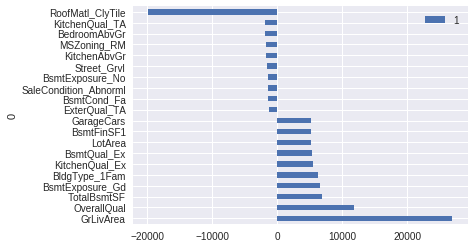

In [86]:
plot_coef(scaled_lasso_cv)

#### Which features add / take away most value from a home?

As seen above, the feature that adds the most value to a home is the 'GrLivArea', or Above grade (ground) living area square feet.  Other features that have a strong postive effect on the Sale Price are Overall Quality, having an excellent quality material on the exterior, and the height of the basement.  

Having Clay Tile as the roof material has the strongest negative impact on Sale Price and Kitchen Above Grade. 
